In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_time_series(time_series: pd.DataFrame, fitted_curve: pd.DataFrame = None, predictions: pd.DataFrame = None, num_series: int = None) -> None:
    if not num_series:
        num_series = time_series.shape[1]

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    colors = [color_cycle[i % len(color_cycle)] for i in range(num_series)]

    for i, (name, series) in enumerate(time_series.iloc[:, :num_series].items()):
        color = colors[i]
        series.plot(color=color, figsize=(10, 7), label=name)
        if fitted_curve is not None:
            fitted_curve.iloc[:, i].plot(color=color, linestyle="--", label="")

        if predictions is not None:
            predictions.iloc[:, i].plot(color=color, linestyle=":", label="")

    if predictions is not None:     
        plt.axvline(predictions.index[0], color="red", linestyle="--")
    
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")  # Move legend to right corner
    plt.subplots_adjust(right=0.8)  # Adjust the right margin to make room for the legend
    plt.show()

In [3]:
df = (
    pd.read_csv("data/disease_burden_risk_factor.csv")
    .assign(Year=lambda x: pd.to_datetime(x["Year"]))
    .set_index("Year")
)

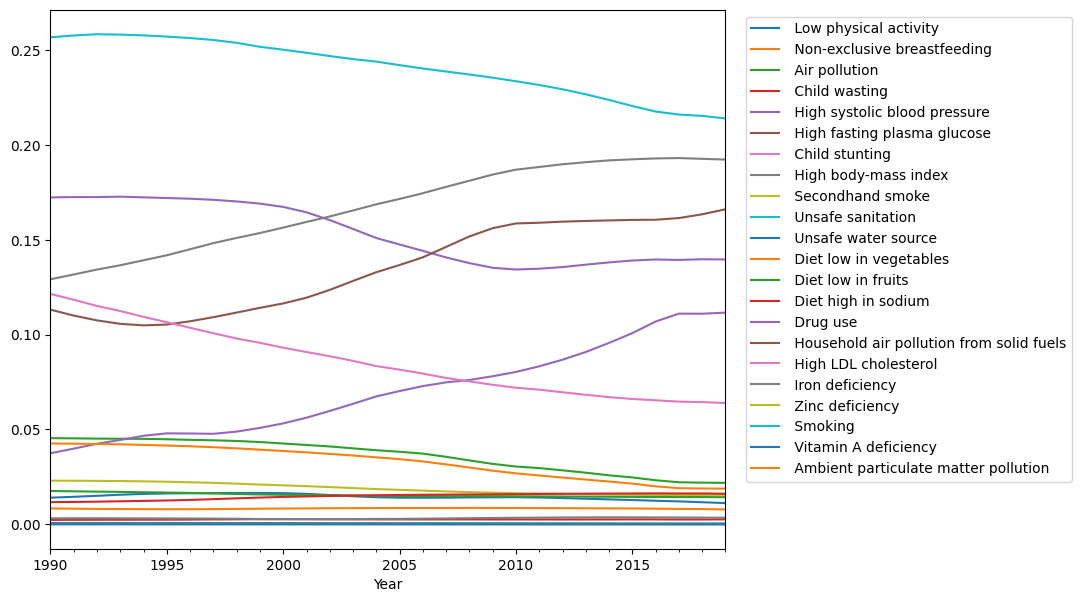

In [4]:
plot_time_series(df)

In [5]:
def treat_zeros(df: pd.DataFrame, thresh: float) -> pd.DataFrame:
    df = df.copy()
    m = (df < thresh).sum(axis=1)
    for idx, row in df.iterrows():
        mask = (row < thresh)
        m = mask.sum()
        S = row[~mask].sum()
        if not m:
            continue
        
        df.loc[idx] = row.mask(mask, thresh).where(mask, lambda x: (1 - thresh * m) * x / S)
  
    return df

In [6]:
from compotime import LocalLevelForecaster

horizon = 10

model = LocalLevelForecaster().fit(df)
predictions = model.predict(horizon)

/home/jamat/Documents/projects/compositional_ts/.venv/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


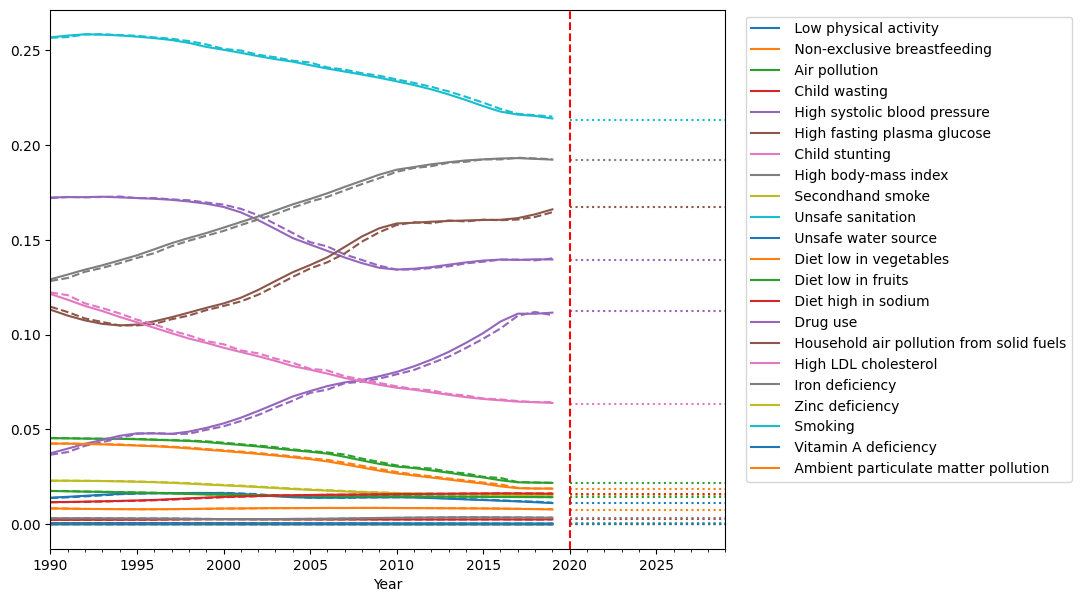

In [7]:
plot_time_series(df, model.fitted_curve_, predictions)

In [8]:
from compotime import LocalTrendForecaster

horizon = 10

model = LocalTrendForecaster().fit(df)
predictions = model.predict(horizon)

/home/jamat/Documents/projects/compositional_ts/.venv/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


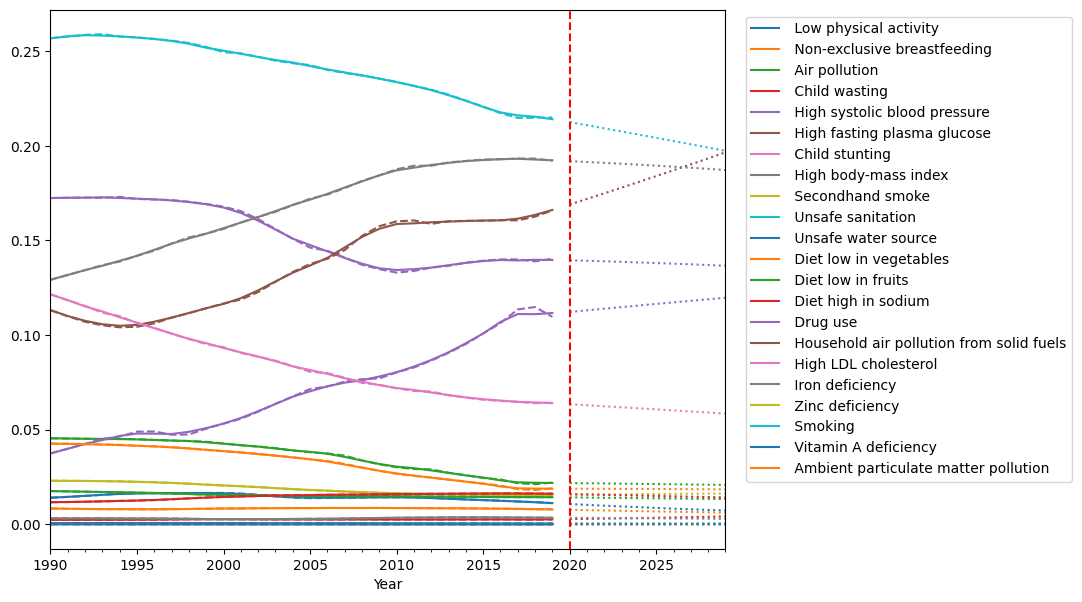

In [9]:
plot_time_series(df, model.fitted_curve_, predictions)